<a href="https://colab.research.google.com/github/DianaBravoPerez/EDP-1/blob/main/prueba_kolmogorov_smirnov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba de Kolmogorov-Smirnov para Números Pseudoaleatorios

**Objetivo:** Verificar si los números pseudoaleatorios de la Tabla 3.1 siguen una distribución uniforme entre 0 y 1, usando la Prueba de Kolmogorov-Smirnov.

La prueba K-S compara la función de distribución acumulada empírica (de nuestros datos) con la función de distribución teórica (uniforme en este caso). Si la diferencia máxima entre ambas es pequeña, los datos se comportan como números aleatorios.

## 1. Importar librerías

Primero importamos lo que vamos a necesitar. NumPy para manejar arreglos, Matplotlib para graficar, y SciPy para la prueba estadística.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 2. Cargar los datos de la Tabla 3.1

Aquí introduzco manualmente los números pseudoaleatorios de la tabla. Son 100 números en total (20 filas × 5 columnas).

In [2]:
# Datos de la Tabla 3.1 - Tabla de números pseudoaleatorios
datos = np.array([
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79982, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.88752, 0.33729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49383, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
])

n = len(datos)
print(f"Total de datos: {n}")
print(f"Mínimo: {datos.min():.5f}")
print(f"Máximo: {datos.max():.5f}")
print(f"Media:  {datos.mean():.5f}  (esperada ≈ 0.5 si es uniforme)")

Total de datos: 100
Mínimo: 0.00121
Máximo: 0.98611
Media:  0.48234  (esperada ≈ 0.5 si es uniforme)


## 3. Cálculo manual de la Prueba K-S

La idea es:
1. Ordenar los datos de menor a mayor.
2. Calcular la función de distribución acumulada empírica: $F_n(x_i) = i/n$
3. Calcular la distribución teórica uniforme: $F(x_i) = x_i$ (ya que U(0,1) tiene CDF igual a x)
4. Calcular $D^+ = \max\left(\frac{i}{n} - x_i\right)$ y $D^- = \max\left(x_i - \frac{i-1}{n}\right)$
5. El estadístico es $D = \max(D^+, D^-)$

In [3]:
# Paso 1: Ordenar los datos
datos_ordenados = np.sort(datos)

# Paso 2: Índices i = 1, 2, ..., n
i = np.arange(1, n + 1)

# Paso 3: CDF empírica y CDF teórica (uniforme => F(x) = x)
F_empirica_sup = i / n          # i/n  (límite superior del escalón)
F_empirica_inf = (i - 1) / n    # (i-1)/n  (límite inferior del escalón)
F_teorica = datos_ordenados     # Para U(0,1), F(x) = x

# Paso 4: D+ y D-
D_plus  = np.max(F_empirica_sup - F_teorica)
D_minus = np.max(F_teorica - F_empirica_inf)

# Paso 5: Estadístico D
D_manual = max(D_plus, D_minus)

print(f"D+  = {D_plus:.6f}")
print(f"D-  = {D_minus:.6f}")
print(f"D   = {D_manual:.6f}  (estadístico K-S)")

D+  = 0.056420
D-  = 0.021850
D   = 0.056420  (estadístico K-S)


## 4. Valor crítico y decisión

Para tomar una decisión necesitamos comparar D con el valor crítico $D_{\alpha}$.

Con $\alpha = 0.05$ y $n = 100$, el valor crítico aproximado es:
$$D_{0.05} \approx \frac{1.36}{\sqrt{n}}$$

- Si $D < D_{\alpha}$ → **No rechazamos** H₀ → los datos se comportan como uniformes ✅
- Si $D \geq D_{\alpha}$ → **Rechazamos** H₀ → los datos NO son uniformes ❌

In [4]:
alpha = 0.05

# Valor crítico para alfa=0.05
D_critico = 1.36 / np.sqrt(n)

print(f"Valor crítico D_0.05 = 1.36 / sqrt({n}) = {D_critico:.6f}")
print(f"Estadístico D        = {D_manual:.6f}")
print()

if D_manual < D_critico:
    print("✅ CONCLUSIÓN: D < D_crítico")
    print("   No se rechaza H₀. Los números se comportan como uniformes en [0,1].")
    print("   ¡Los números pseudoaleatorios pasan la prueba K-S!")
else:
    print("❌ CONCLUSIÓN: D >= D_crítico")
    print("   Se rechaza H₀. Los números NO siguen una distribución uniforme.")

Valor crítico D_0.05 = 1.36 / sqrt(100) = 0.136000
Estadístico D        = 0.056420

✅ CONCLUSIÓN: D < D_crítico
   No se rechaza H₀. Los números se comportan como uniformes en [0,1].
   ¡Los números pseudoaleatorios pasan la prueba K-S!


## 5. Verificación con SciPy

SciPy tiene una función que hace todo esto automáticamente. La uso para verificar que mis cálculos están bien.

In [5]:
# stats.kstest compara los datos contra la distribución que le indiquemos
# 'uniform' = distribución uniforme U(0,1)
estadistico, p_valor = stats.kstest(datos, 'uniform')

print(f"Estadístico D (SciPy) = {estadistico:.6f}")
print(f"Estadístico D (manual)= {D_manual:.6f}")
print(f"p-valor               = {p_valor:.6f}")
print()

if p_valor > alpha:
    print(f"✅ p-valor ({p_valor:.4f}) > α ({alpha}) → No se rechaza H₀")
else:
    print(f"❌ p-valor ({p_valor:.4f}) ≤ α ({alpha}) → Se rechaza H₀")

Estadístico D (SciPy) = 0.056420
Estadístico D (manual)= 0.056420
p-valor               = 0.889866

✅ p-valor (0.8899) > α (0.05) → No se rechaza H₀


## 6. Visualización

Vamos a graficar la CDF empírica vs la CDF teórica para ver visualmente qué tan bien se ajustan los datos.

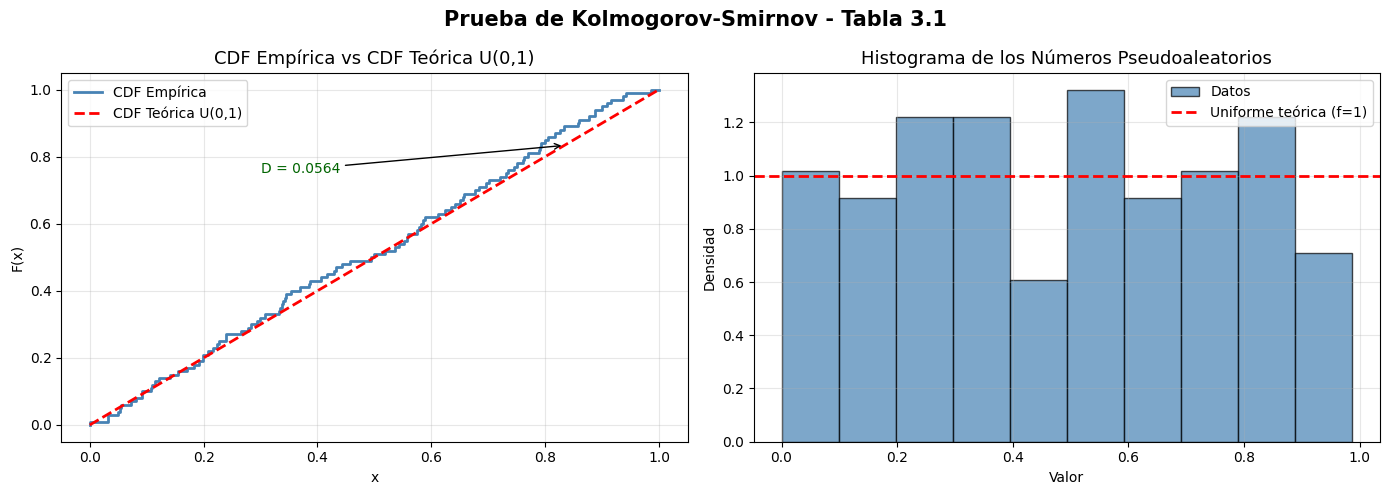

Gráfica guardada como 'ks_resultado.png'


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Gráfica 1: CDF empírica vs CDF teórica ---
ax1 = axes[0]

# CDF empírica (escalera)
x_ecdf = np.concatenate([[0], datos_ordenados, [1]])
y_ecdf = np.concatenate([[0], np.arange(1, n+1)/n, [1]])
ax1.step(x_ecdf, y_ecdf, where='post', label='CDF Empírica', color='steelblue', linewidth=2)

# CDF teórica U(0,1)
x_teo = np.linspace(0, 1, 200)
ax1.plot(x_teo, x_teo, 'r--', label='CDF Teórica U(0,1)', linewidth=2)

# Marcar el punto de D máximo
idx_D = np.argmax(np.abs(F_empirica_sup - F_teorica))
ax1.annotate(f'D = {D_manual:.4f}',
             xy=(datos_ordenados[idx_D], F_teorica[idx_D]),
             xytext=(0.3, 0.75),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=10, color='darkgreen')

ax1.set_title('CDF Empírica vs CDF Teórica U(0,1)', fontsize=13)
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- Gráfica 2: Histograma de los datos ---
ax2 = axes[1]
ax2.hist(datos, bins=10, edgecolor='black', color='steelblue', alpha=0.7, density=True, label='Datos')
ax2.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Uniforme teórica (f=1)')
ax2.set_title('Histograma de los Números Pseudoaleatorios', fontsize=13)
ax2.set_xlabel('Valor')
ax2.set_ylabel('Densidad')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('Prueba de Kolmogorov-Smirnov - Tabla 3.1', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('ks_resultado.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfica guardada como 'ks_resultado.png'")

## 7. Resumen de Resultados

Aquí junto todo para presentarlo de forma clara.

In [8]:
print("=" * 50)
print("   RESUMEN - PRUEBA KOLMOGOROV-SMIRNOV")
print("=" * 50)
print(f"  Hipótesis nula (H₀): Los datos siguen U(0,1)")
print(f"  Nivel de significancia (α): {alpha}")
print(f"  Tamaño de muestra (n):      {n}")
print("-" * 50)
print(f"  Estadístico D calculado:  {D_manual:.6f}")
print(f"  Valor crítico D_0.05:     {D_critico:.6f}")
print(f"  p-valor:                  {p_valor:.6f}")
print("-" * 50)

if D_manual < D_critico:
    print("  DECISIÓN: No se rechaza H₀ ✅")
    print("  Los números pseudoaleatorios pasan la")
    print("  prueba K-S y pueden considerarse uniformes.")
else:
    print("  DECISIÓN: Se rechaza H₀ ❌")
print("=" * 50)

   RESUMEN - PRUEBA KOLMOGOROV-SMIRNOV
  Hipótesis nula (H₀): Los datos siguen U(0,1)
  Nivel de significancia (α): 0.05
  Tamaño de muestra (n):      100
--------------------------------------------------
  Estadístico D calculado:  0.056420
  Valor crítico D_0.05:     0.136000
  p-valor:                  0.889866
--------------------------------------------------
  DECISIÓN: No se rechaza H₀ ✅
  Los números pseudoaleatorios pasan la
  prueba K-S y pueden considerarse uniformes.
